In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Heart Dataset

In [19]:
data = pd.read_csv('dataset/heart.csv')
features = data.drop(columns=['DEATH_EVENT', 'time'])
targets = data['DEATH_EVENT']
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)
train_features, val_features, train_targets, val_targets = train_test_split(normalized_features, targets, test_size=0.2, random_state=42)

## Feature Correlation

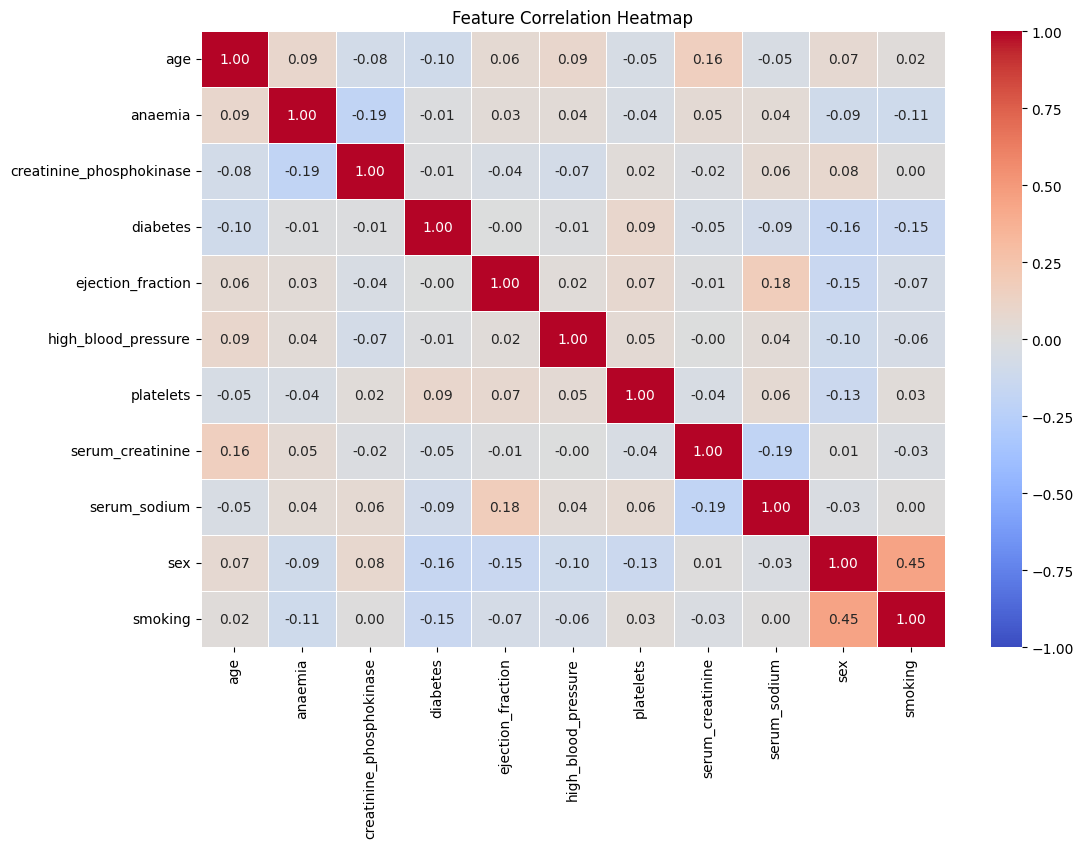

In [21]:
correlation_matrix = normalized_df.corr()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.savefig("report/Heart_Feature_Correlation.png")
plt.show()

## Feature Importance

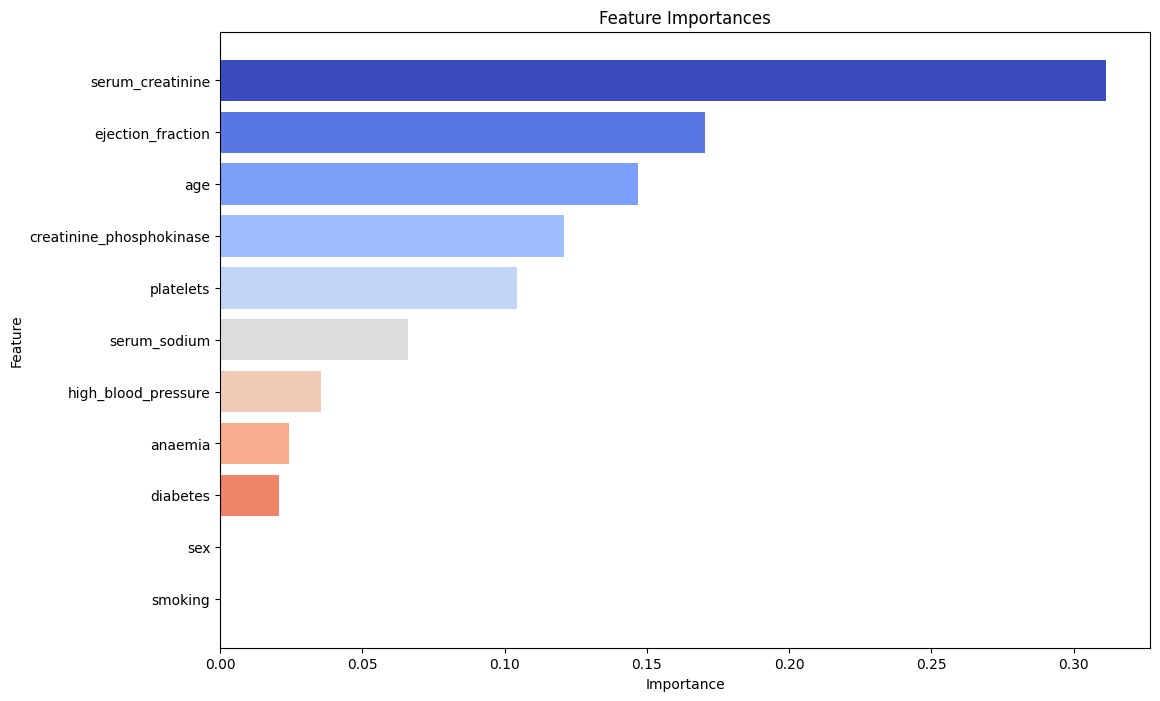

In [23]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df, targets, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
sorted_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_df['Feature'], sorted_df['Importance'], color=plt.cm.coolwarm(np.linspace(0, 1, len(sorted_df))))
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.savefig("report/Heart_Feature_Importance.png")
plt.show()


# COVID Datatset

In [24]:
file_path = 'dataset/Covid19.csv'
data = pd.read_csv(file_path)
features = data.drop(columns=['label'])
target = data['label']
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)

## Feature Correlation

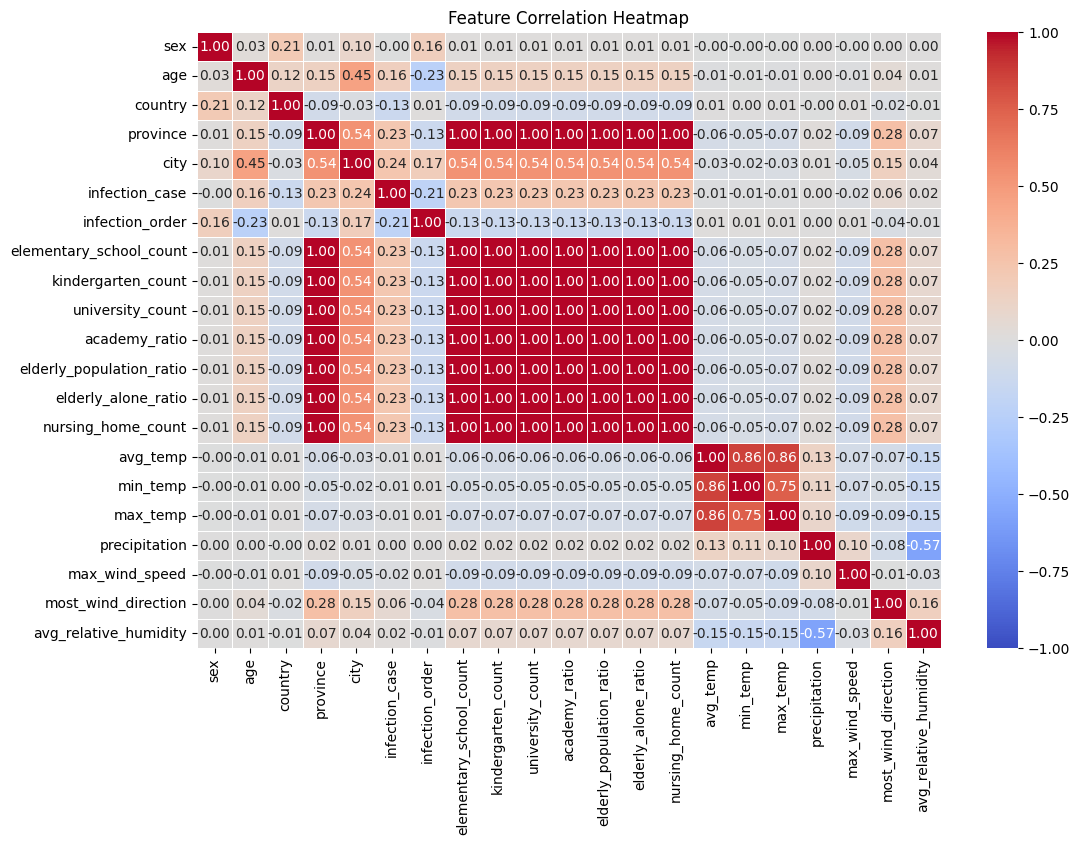

In [25]:
correlation_matrix = normalized_df.corr()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.savefig("report/COVID_Feature_Correlation.png")
plt.show()

## Feature Importance

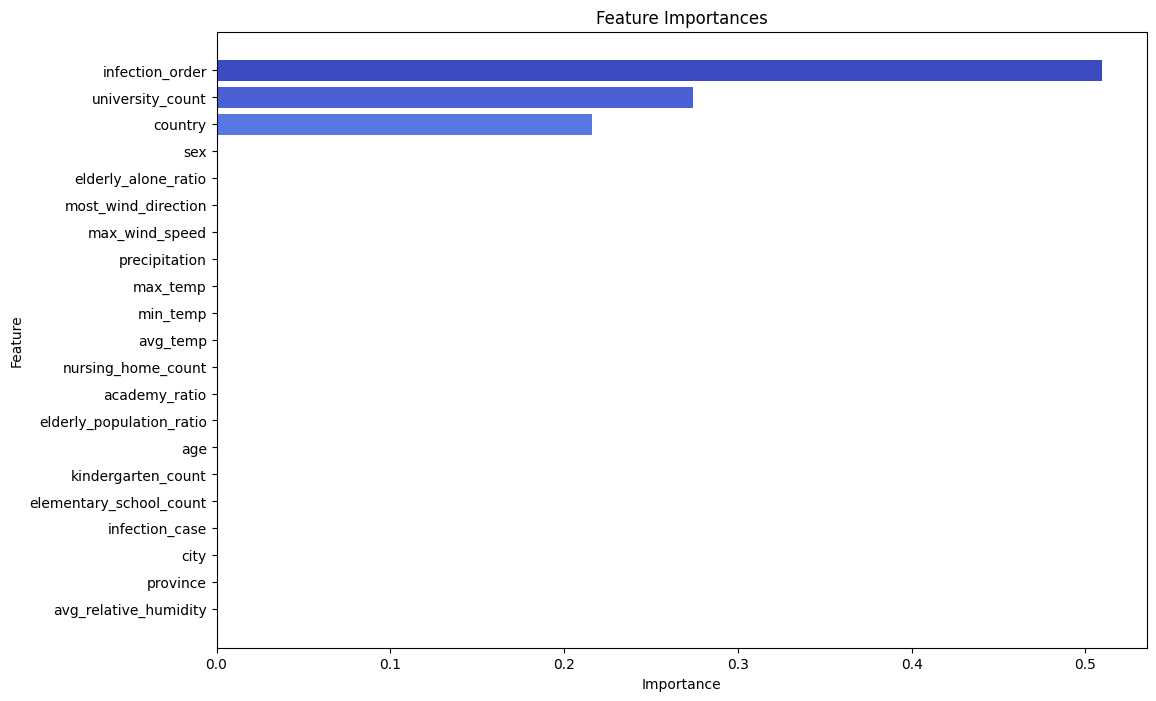

In [26]:

X_train, X_test, y_train, y_test = train_test_split(normalized_df, target, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
sorted_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_df['Feature'], sorted_df['Importance'], color=plt.cm.coolwarm(np.linspace(0, 1, len(sorted_df))))
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.savefig("report/COVID_Feature_Importance.png")
plt.show()


# Abalone Data

In [27]:
file_path = 'dataset/abalone.data'
column_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
abalone_data = pd.read_csv(file_path, header=None, names=column_names)

## Feature Correlation

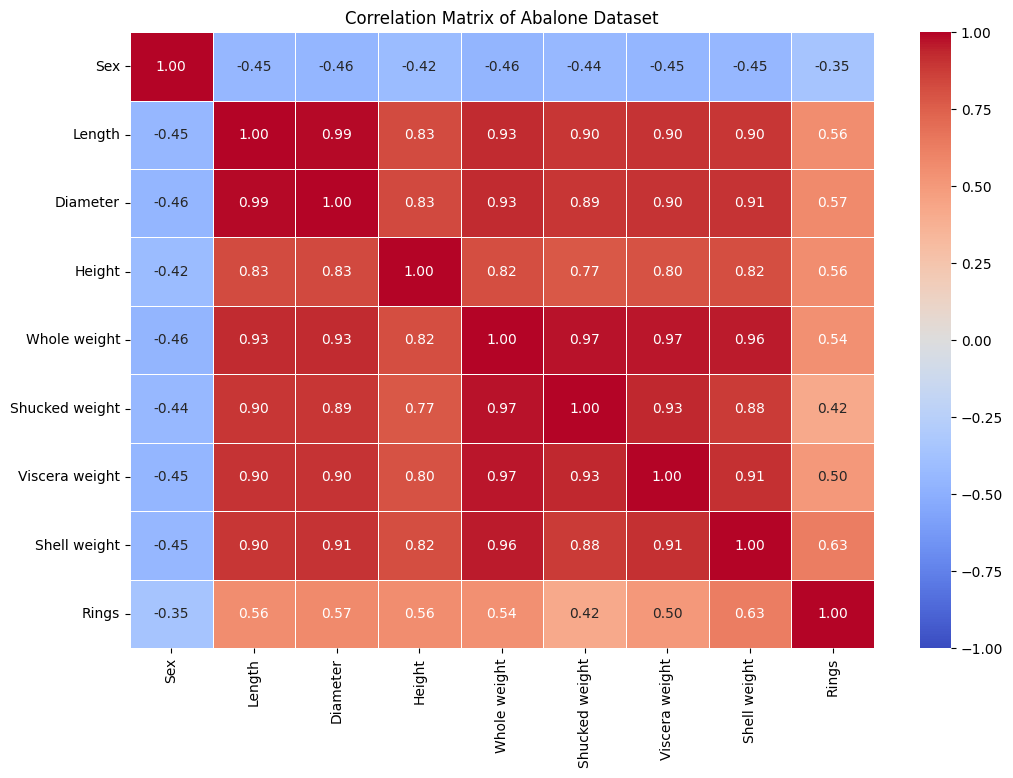

In [28]:
abalone_data['Sex'] = abalone_data['Sex'].map({'M': 1, 'F': 2, 'I': 3})
correlation_matrix = abalone_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f' ,center=0, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Abalone Dataset')
plt.savefig("report/Abalone_Feature_Correlation.png")
plt.show()

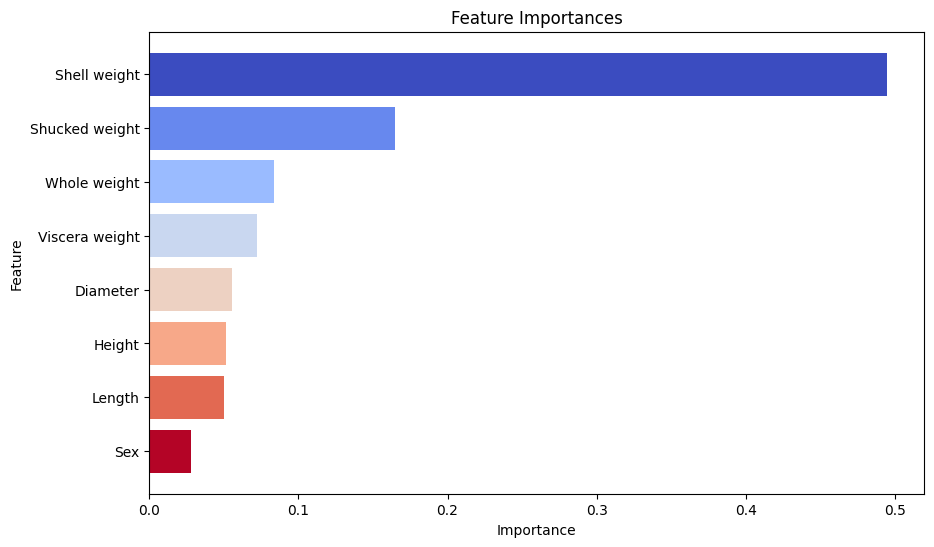

In [29]:
from sklearn.ensemble import RandomForestRegressor
X = abalone_data.drop('Rings', axis=1)
y = abalone_data['Rings']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
sorted_df = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_df['Feature'], sorted_df['Importance'], color=plt.cm.coolwarm(np.linspace(0, 1, len(sorted_df))))
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.savefig("report/Abalone_Feature_Importance.png")
plt.show()


## Data Balance

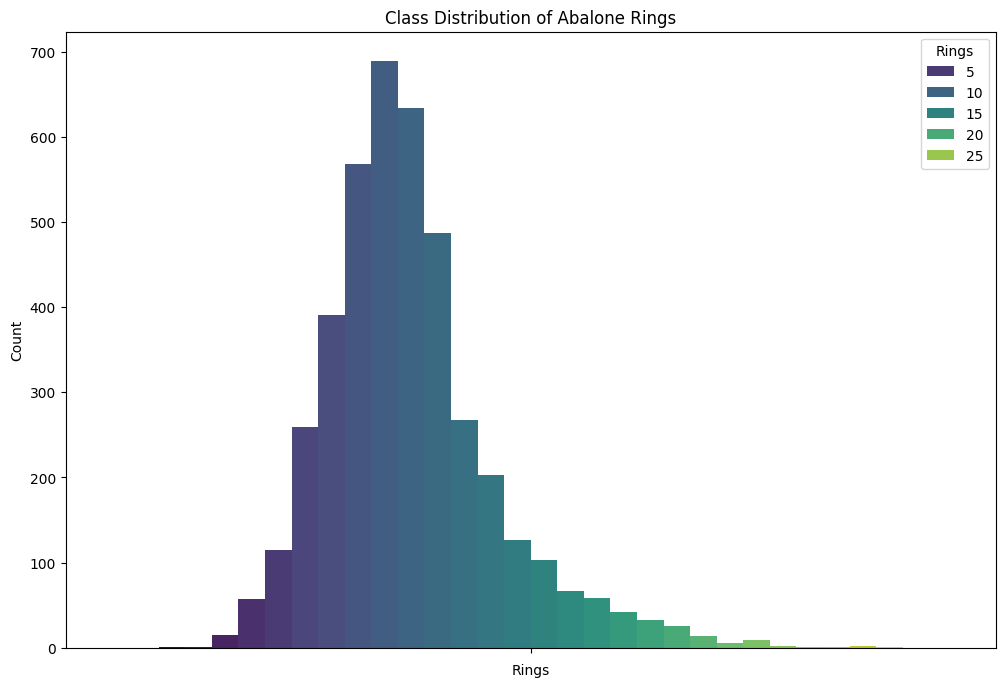

In [35]:
rings_counts = abalone_data['Rings'].value_counts()
plt.figure(figsize=(12, 8))
rings_counts_df = rings_counts.reset_index()
rings_counts_df.columns = ['Rings', 'Count']
sns.barplot(data=rings_counts_df, hue='Rings', y='Count', palette='viridis')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.title('Class Distribution of Abalone Rings')
plt.savefig("report/Abalone_Data_Imbalance.png")
plt.xticks(rotation=90) 
plt.show()